In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

# general libraries
import os  # make folders for file output
import h5py as h5
import json

from analysis import *
from general_utils import *
from hdf_utils import unpack_hdf
from scalebars import *

import balance_configs as configs
import experiments as exps
import analysis as ana

In [2]:
%matplotlib notebook
plt.rcParams.update({"figure.max_open_warning": 0})

In [3]:
# data_path = "/mnt/Data/NEURONoutput/sac_net/committee_runs/"
base_path = "/mnt/Data/NEURONoutput/sac_net/"

## TODO:
- enable parallel runs with saving to h5 along the way, as done with the sac-sac models
- update the synapses to enable poisson quantal input, as in the sac-sac model
- fill out notebook with figures and interactive displays

In [4]:
model_path = os.path.join(base_path, "model_runs")
save_name = "test"
# load_name = None
load_name = "test"

if load_name is not None:
    # TODO: see whether turning off compression makes a big difference in loading. Not sure
    # why the unpacking takes so long for this dataset (longer than large sacsac exps)
    with h5.File(os.path.join(model_path, load_name + ".h5"), "r") as f:
        d = unpack_hdf(f)
else:
    from ei_balance_nogui import *
    os.makedirs(model_path, exist_ok=True)
    save_path = os.path.join(model_path, save_name) + ".h5"
    exps.sacnet_run(
        save_path,
        configs.sac_mode_config(),
        n_nets=3,
        n_trials=3,
        rho_steps=[0.0, 1.0],
        pool_sz=8,
    )

    with h5.File(save_path, "r") as pckg:
        d = unpack_hdf(pckg)
        
# deserialize parameter dicts
for i in d.keys():
    for rho in d[i].keys():
        d[i][rho]["params"] = json.loads(d[i][rho]["params"])
        
# rearrange hierarchy (rho condition above repeats)
idxs = list(d.keys())
rhos = list(d[idxs[0]].keys())
data = {r: {i: d[i][rho] for i in idxs} for r in rhos}

In [10]:
metrics = ana.get_sac_metrics(data)

dir_labels = [225, 270, 315, 0, 45, 90, 135, 180]
tuning = ana.analyze_tree(data, dir_labels, pref=0, thresh=-57)
sac_thetas = ana.get_sac_thetas(data)
sac_deltas = ana.get_sac_deltas(sac_thetas)

<IPython.core.display.Javascript object>


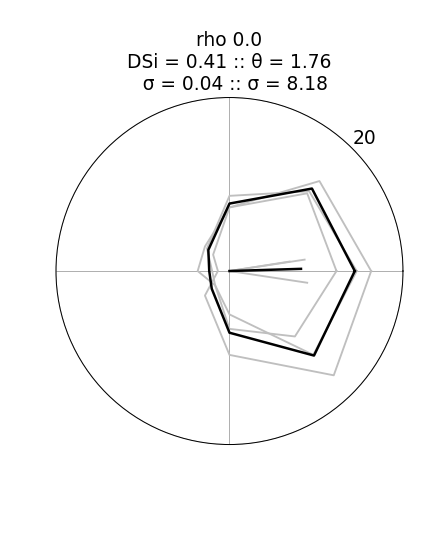

<IPython.core.display.Javascript object>


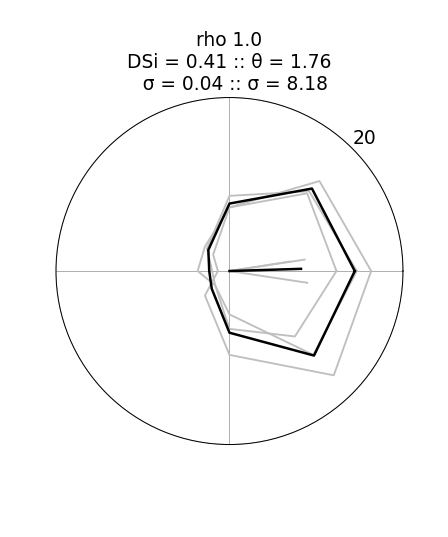

In [11]:
polars = sac_rho_polars(
    metrics,
    dir_labels,
    net_shadows=True,
    save=False,
)

In [ ]:
data[1.0][0]["dendrites"]["Vm"].shape

In [12]:
metrics[0].keys()

dict_keys(['spikes', 'thetas', 'DSis', 'avg_theta', 'avg_DSi'])

In [16]:
metrics[0.0]["DSis"]

array([[0.346, 0.34 , 0.371],
       [0.503, 0.414, 0.443],
       [0.42 , 0.481, 0.423]])

In [17]:
metrics[1.0]["DSis"]

array([[0.346, 0.34 , 0.371],
       [0.503, 0.414, 0.443],
       [0.42 , 0.481, 0.423]])

In [18]:
idxs

[0, 1, 2]

In [19]:
rhos

[0.0, 1.0]

In [10]:
data = {r: {i: data[i][rho] for i in idxs} for r in rhos}

In [6]:
data[0][1]["metrics"]["DSis"]

array([0.503, 0.414, 0.443])